In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import statsmodels.api as sm
import pylab as py
from plotly.subplots import make_subplots
from sklearn import preprocessing
import catboost as cb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import shap

import pandas as pd
import keras_tuner
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from keras_tuner.tuners import Hyperband

import pandas as pd
df = pd.read_csv('C:\\Users\\SUSNATA BISWAS\\OneDrive\\Desktop\\UAV.csv')

C:\Users\SUSNATA BISWAS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\SUSNATA BISWAS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df.head(10)

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,uvindex,severerisk,conditions,icon,stations,Gap angle,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,"Birmingham, England, United Kingdom",6/1/2022,8.5,8,6.7,88.53,0,0,NaN,0,...,0,10,Partially cloudy,partly-cloudy-night,"03529099999,03414099999,EGBB,03535099999,03534...",69.0,0.281703,22.382043,2.566546,24.11447322
1,"Birmingham, England, United Kingdom",6/1/2022,6.8,6.8,6.3,96.41,0,0,NaN,0,...,0,10,Partially cloudy,partly-cloudy-night,"03529099999,03414099999,EGBB,03535099999,03534...",340.0,-0.900007,28.187742,10.483025,22.11221897
2,"Birmingham, England, United Kingdom",6/1/2022,6.2,6.2,5.8,97.67,0,0,NaN,0,...,0,10,Clear,clear-night,"03529099999,03414099999,EGBB,03535099999,03534...",266.0,-0.688493,29.375444,1.553021,24.97105023
3,"Birmingham, England, United Kingdom",6/1/2022,5.5,4.6,5.3,98.46,0,0,NaN,0,...,0,10,Partially cloudy,partly-cloudy-night,"03529099999,03414099999,EGBB,03535099999,03534...",18.0,0.635886,23.710883,13.169636,26.51038418
4,"Birmingham, England, United Kingdom",6/1/2022,6,6,5.8,98.6,0,0,NaN,0,...,0,10,Overcast,cloudy,"03529099999,03414099999,EGBB,03535099999,03534...",35.0,0.526626,20.025423,14.554085,21.45772112
5,"Birmingham, England, United Kingdom",6/1/2022,7.1,7.1,7,98.95,0.02,100,rain,0,...,0,10,"Rain, Partially cloudy",rain,"03529099999,03414099999,EGBB,03535099999,03534...",358.0,-0.908703,26.219584,11.742752,19.3975562
6,"Birmingham, England, United Kingdom",6/1/2022,8.4,7.3,8.2,98.81,0.02,100,rain,0,...,0,10,"Rain, Partially cloudy",rain,"03529099999,03414099999,EGBB,03535099999,03534...",224.0,-0.661019,20.292279,12.470840,12.9191122
7,"Birmingham, England, United Kingdom",6/1/2022,9.4,8.9,8.8,96.14,0.02,100,rain,0,...,1,10,"Rain, Partially cloudy",rain,"03529099999,03414099999,EGBB,03535099999,03534...",111.0,0.317224,23.896022,14.545962,23.90359735
8,"Birmingham, England, United Kingdom",6/1/2022,10.9,10.9,9,88.14,0.02,100,rain,0,...,2,10,"Rain, Partially cloudy",rain,"03529099999,EGBB,03647099999,03535099999,03534...",279.0,0.454431,20.007064,2.977960,25.38914851
9,"Birmingham, England, United Kingdom",6/1/2022,11,11,8.8,86.8,0.02,100,rain,0,...,2,10,"Rain, Overcast",rain,"03529099999,03414099999,EGBB,03647099999,03535...",360.0,0.346707,26.105161,5.923844,29.61544896


In [3]:
df = df.drop(['name','datetime','stations','preciptype','precipprob','solarenergy'] , axis = 1)
df

,temp,feelslike,dew,humidity,precip,snow,snowdepth,windgust,windspeed,winddir,...,solarradiation,uvindex,severerisk,conditions,icon,Gap angle,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,8,6.7,88.53,0,0,0,7.90,5.40,270,...,0,0,10,Partially cloudy,partly-cloudy-night,69.0,0.281703,22.382043,2.566546,24.11447322
1,6.8,6.8,6.3,96.41,0,0,0,5.10,3.20,286,...,0,0,10,Partially cloudy,partly-cloudy-night,340.0,-0.900007,28.187742,10.483025,22.11221897
2,6.2,6.2,5.8,97.67,0,0,0,6.20,4.30,195,...,0,0,10,Clear,clear-night,266.0,-0.688493,29.375444,1.553021,24.97105023
3,5.5,4.6,5.3,98.46,0,0,0,8.90,5.30,192,...,0,0,10,Partially cloudy,partly-cloudy-night,18.0,0.635886,23.710883,13.169636,26.51038418
4,6,6,5.8,98.6,0,0,0,7.90,4.30,174,...,0,0,10,Overcast,cloudy,35.0,0.526626,20.025423,14.554085,21.45772112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,14.6,11.3,80.59,1.3,0,0,30.20,16.90,206.9,...,370,4,10,Overcast,cloudy,79.0,-0.784794,28.608596,4.485393,8.161947594
597,13.6,13.6,10.9,83.73,0,0,0,31.40,15.70,205.9,...,272.3,3,10,Partially cloudy,partly-cloudy-day,308.0,-0.715012,24.484307,3.080164,6.761283669
598,12.6,12.6,10.4,87.04,0,0,0,32.60,14.50,204.9,...,174.7,2,10,Partially cloudy,partly-cloudy-day,208.0,-0.109373,25.770818,5.489982,22.28967933
599,11.6,11.6,10.1,90.51,0.1,0,0,33.80,13.30,203.9,...,77,0,10,Clear,clear-night,205.0,-0.710821,27.896114,9.099070,10.33508325


In [4]:
df = df.dropna()
df

,temp,feelslike,dew,humidity,precip,snow,snowdepth,windgust,windspeed,winddir,...,solarradiation,uvindex,severerisk,conditions,icon,Gap angle,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,8,6.7,88.53,0,0,0,7.90,5.40,270,...,0,0,10,Partially cloudy,partly-cloudy-night,69.0,0.281703,22.382043,2.566546,24.11447322
1,6.8,6.8,6.3,96.41,0,0,0,5.10,3.20,286,...,0,0,10,Partially cloudy,partly-cloudy-night,340.0,-0.900007,28.187742,10.483025,22.11221897
2,6.2,6.2,5.8,97.67,0,0,0,6.20,4.30,195,...,0,0,10,Clear,clear-night,266.0,-0.688493,29.375444,1.553021,24.97105023
3,5.5,4.6,5.3,98.46,0,0,0,8.90,5.30,192,...,0,0,10,Partially cloudy,partly-cloudy-night,18.0,0.635886,23.710883,13.169636,26.51038418
4,6,6,5.8,98.6,0,0,0,7.90,4.30,174,...,0,0,10,Overcast,cloudy,35.0,0.526626,20.025423,14.554085,21.45772112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,14.6,11.3,80.59,1.3,0,0,30.20,16.90,206.9,...,370,4,10,Overcast,cloudy,79.0,-0.784794,28.608596,4.485393,8.161947594
597,13.6,13.6,10.9,83.73,0,0,0,31.40,15.70,205.9,...,272.3,3,10,Partially cloudy,partly-cloudy-day,308.0,-0.715012,24.484307,3.080164,6.761283669
598,12.6,12.6,10.4,87.04,0,0,0,32.60,14.50,204.9,...,174.7,2,10,Partially cloudy,partly-cloudy-day,208.0,-0.109373,25.770818,5.489982,22.28967933
599,11.6,11.6,10.1,90.51,0.1,0,0,33.80,13.30,203.9,...,77,0,10,Clear,clear-night,205.0,-0.710821,27.896114,9.099070,10.33508325


In [5]:
df['temp'] = pd.to_numeric(df['temp'])
df['dew'] = pd.to_numeric(df['dew'])
df['humidity'] = pd.to_numeric(df['humidity'])
df['precip'] = pd.to_numeric(df['precip'])
df['windspeed'] = pd.to_numeric(df['windspeed'])
df['snowdepth'] = pd.to_numeric(df['snowdepth'])
df['sealevelpressure'] = pd.to_numeric(df['sealevelpressure'])
df['solarradiation'] = pd.to_numeric(df['solarradiation'])
df['uvindex'] = pd.to_numeric(df['uvindex'])
df['visibility'] = pd.to_numeric(df['visibility'])
df['cloudcover'] = pd.to_numeric(df['cloudcover'])
df['windgust'] = pd.to_numeric(df['windgust'])
df['Final UAV Speed'] = pd.to_numeric(df['Final UAV Speed'])
df['snow'] = pd.to_numeric(df['snow'])
df['winddir'] = pd.to_numeric(df['winddir'])
df['severerisk'] = pd.to_numeric(df['severerisk'])

In [6]:
df1 = df.drop(['snow','snowdepth','Gap angle','feelslike'], axis = 1)
df1

,temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,icon,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,6.7,88.53,0.0,7.9,5.4,270.0,1014.4,28.1,19.7,0.0,0,10,Partially cloudy,partly-cloudy-night,0.281703,22.382043,2.566546,24.114473
1,6.8,6.3,96.41,0.0,5.1,3.2,286.0,1015.0,20.5,16.6,0.0,0,10,Partially cloudy,partly-cloudy-night,-0.900007,28.187742,10.483025,22.112219
2,6.2,5.8,97.67,0.0,6.2,4.3,195.0,1015.1,4.4,12.1,0.0,0,10,Clear,clear-night,-0.688493,29.375444,1.553021,24.971050
3,5.5,5.3,98.46,0.0,8.9,5.3,192.0,1015.0,28.7,10.1,0.0,0,10,Partially cloudy,partly-cloudy-night,0.635886,23.710883,13.169636,26.510384
4,6.0,5.8,98.60,0.0,7.9,4.3,174.0,1014.4,92.3,13.1,0.0,0,10,Overcast,cloudy,0.526626,20.025423,14.554085,21.457721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,80.59,1.3,30.2,16.9,206.9,1001.0,99.7,10.0,370.0,4,10,Overcast,cloudy,-0.784794,28.608596,4.485393,8.161948
597,13.6,10.9,83.73,0.0,31.4,15.7,205.9,1001.3,73.1,14.7,272.3,3,10,Partially cloudy,partly-cloudy-day,-0.715012,24.484307,3.080164,6.761284
598,12.6,10.4,87.04,0.0,32.6,14.5,204.9,1001.7,46.6,19.4,174.7,2,10,Partially cloudy,partly-cloudy-day,-0.109373,25.770818,5.489982,22.289679
599,11.6,10.1,90.51,0.1,33.8,13.3,203.9,1002.0,20.0,24.1,77.0,0,10,Clear,clear-night,-0.710821,27.896114,9.099070,10.335083


In [7]:
df2 = df1.drop(['icon','severerisk','winddir','cloudcover'], axis = 1)
df2

,temp,dew,humidity,precip,windgust,windspeed,sealevelpressure,visibility,solarradiation,uvindex,conditions,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,6.7,88.53,0.0,7.9,5.4,1014.4,19.7,0.0,0,Partially cloudy,0.281703,22.382043,2.566546,24.114473
1,6.8,6.3,96.41,0.0,5.1,3.2,1015.0,16.6,0.0,0,Partially cloudy,-0.900007,28.187742,10.483025,22.112219
2,6.2,5.8,97.67,0.0,6.2,4.3,1015.1,12.1,0.0,0,Clear,-0.688493,29.375444,1.553021,24.971050
3,5.5,5.3,98.46,0.0,8.9,5.3,1015.0,10.1,0.0,0,Partially cloudy,0.635886,23.710883,13.169636,26.510384
4,6.0,5.8,98.60,0.0,7.9,4.3,1014.4,13.1,0.0,0,Overcast,0.526626,20.025423,14.554085,21.457721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,80.59,1.3,30.2,16.9,1001.0,10.0,370.0,4,Overcast,-0.784794,28.608596,4.485393,8.161948
597,13.6,10.9,83.73,0.0,31.4,15.7,1001.3,14.7,272.3,3,Partially cloudy,-0.715012,24.484307,3.080164,6.761284
598,12.6,10.4,87.04,0.0,32.6,14.5,1001.7,19.4,174.7,2,Partially cloudy,-0.109373,25.770818,5.489982,22.289679
599,11.6,10.1,90.51,0.1,33.8,13.3,1002.0,24.1,77.0,0,Clear,-0.710821,27.896114,9.099070,10.335083


In [8]:
df3 = df2.drop(['humidity','uvindex','sealevelpressure','solarradiation'], axis = 1)
df3

,temp,dew,precip,windgust,windspeed,visibility,conditions,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,6.7,0.0,7.9,5.4,19.7,Partially cloudy,0.281703,22.382043,2.566546,24.114473
1,6.8,6.3,0.0,5.1,3.2,16.6,Partially cloudy,-0.900007,28.187742,10.483025,22.112219
2,6.2,5.8,0.0,6.2,4.3,12.1,Clear,-0.688493,29.375444,1.553021,24.971050
3,5.5,5.3,0.0,8.9,5.3,10.1,Partially cloudy,0.635886,23.710883,13.169636,26.510384
4,6.0,5.8,0.0,7.9,4.3,13.1,Overcast,0.526626,20.025423,14.554085,21.457721
...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,1.3,30.2,16.9,10.0,Overcast,-0.784794,28.608596,4.485393,8.161948
597,13.6,10.9,0.0,31.4,15.7,14.7,Partially cloudy,-0.715012,24.484307,3.080164,6.761284
598,12.6,10.4,0.0,32.6,14.5,19.4,Partially cloudy,-0.109373,25.770818,5.489982,22.289679
599,11.6,10.1,0.1,33.8,13.3,24.1,Clear,-0.710821,27.896114,9.099070,10.335083


In [9]:
df3['conditions'].unique()

array(['Partially cloudy', 'Clear', 'Overcast', 'Rain, Partially cloudy',
       'Rain, Overcast'], dtype=object)

In [10]:
one_hot_encoded_data = pd.get_dummies(df3, columns = ['conditions'])

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


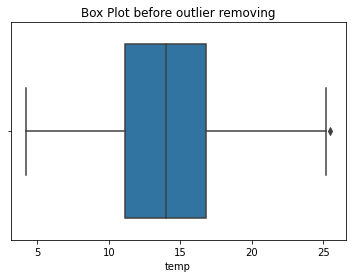

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


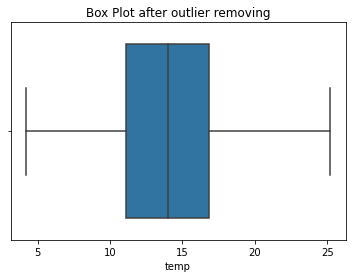

In [11]:
from matplotlib import pyplot as plt
sns.boxplot(one_hot_encoded_data['temp'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(one_hot_encoded_data, 'temp')
sns.boxplot(one_hot_encoded_data['temp'])
plt.title("Box Plot after outlier removing")
plt.show()

In [12]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in one_hot_encoded_data['windspeed']:
        if i > q3 or i < q1:
            one_hot_encoded_data['windspeed'] = one_hot_encoded_data['windspeed'].replace(i, med)

In [13]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in one_hot_encoded_data['windgust']:
        if i > q3 or i < q1:
            one_hot_encoded_data['windgust'] = one_hot_encoded_data['windgust'].replace(i, med)

In [14]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in one_hot_encoded_data['visibility']:
        if i > q3 or i < q1:
            one_hot_encoded_data['visibility'] = one_hot_encoded_data['visibility'].replace(i, med)

In [15]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in one_hot_encoded_data['UAV Speed']:
        if i > q3 or i < q1:
            one_hot_encoded_data['UAV Speed'] = one_hot_encoded_data['UAV Speed'].replace(i, med)

In [16]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in one_hot_encoded_data['UAV Payload']:
        if i > q3 or i < q1:
            one_hot_encoded_data['UAV Payload'] = one_hot_encoded_data['UAV Payload'].replace(i, med)

In [17]:
one_hot_encoded_data

,temp,dew,precip,windgust,windspeed,visibility,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,8.5,6.7,0.0,7.9,5.4,19.7,0.281703,22.382043,2.566546,24.114473,0,0,1,0,0
1,6.8,6.3,0.0,5.1,3.2,16.6,-0.900007,28.187742,10.483025,22.112219,0,0,1,0,0
2,6.2,5.8,0.0,6.2,4.3,12.1,-0.688493,29.375444,1.553021,24.971050,1,0,0,0,0
3,5.5,5.3,0.0,8.9,5.3,10.1,0.635886,23.710883,13.169636,26.510384,0,0,1,0,0
4,6.0,5.8,0.0,7.9,4.3,13.1,0.526626,20.025423,14.554085,21.457721,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,1.3,30.2,16.9,10.0,-0.784794,28.608596,4.485393,8.161948,0,1,0,0,0
597,13.6,10.9,0.0,31.4,15.7,14.7,-0.715012,24.484307,3.080164,6.761284,0,0,1,0,0
598,12.6,10.4,0.0,32.6,14.5,19.4,-0.109373,25.770818,5.489982,22.289679,0,0,1,0,0
599,11.6,10.1,0.1,33.8,13.3,24.1,-0.710821,27.896114,9.099070,10.335083,1,0,0,0,0


In [18]:
import pandas as pd     

In [19]:
from sklearn import preprocessing

In [20]:
X = one_hot_encoded_data[['temp','dew','precip','windgust','windspeed','visibility','cos(gap angle)','UAV Speed','UAV Payload','conditions_Clear','conditions_Overcast','conditions_Partially cloudy','conditions_Rain, Overcast','conditions_Rain, Partially cloudy']]
y = one_hot_encoded_data['Final UAV Speed']

In [21]:
X

,temp,dew,precip,windgust,windspeed,visibility,cos(gap angle),UAV Speed,UAV Payload,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,8.5,6.7,0.0,7.9,5.4,19.7,0.281703,22.382043,2.566546,0,0,1,0,0
1,6.8,6.3,0.0,5.1,3.2,16.6,-0.900007,28.187742,10.483025,0,0,1,0,0
2,6.2,5.8,0.0,6.2,4.3,12.1,-0.688493,29.375444,1.553021,1,0,0,0,0
3,5.5,5.3,0.0,8.9,5.3,10.1,0.635886,23.710883,13.169636,0,0,1,0,0
4,6.0,5.8,0.0,7.9,4.3,13.1,0.526626,20.025423,14.554085,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,14.6,11.3,1.3,30.2,16.9,10.0,-0.784794,28.608596,4.485393,0,1,0,0,0
597,13.6,10.9,0.0,31.4,15.7,14.7,-0.715012,24.484307,3.080164,0,0,1,0,0
598,12.6,10.4,0.0,32.6,14.5,19.4,-0.109373,25.770818,5.489982,0,0,1,0,0
599,11.6,10.1,0.1,33.8,13.3,24.1,-0.710821,27.896114,9.099070,1,0,0,0,0


In [22]:
y

0      24.114473
1      22.112219
2      24.971050
3      26.510384
4      21.457721
         ...    
596     8.161948
597     6.761284
598    22.289679
599    10.335083
600    34.311301
Name: Final UAV Speed, Length: 599, dtype: float64

In [23]:
one_hot_encoded_data_final = one_hot_encoded_data.drop(['visibility','dew','precip','conditions_Partially cloudy','conditions_Overcast','conditions_Clear','conditions_Rain, Partially cloudy','conditions_Rain, Overcast'], axis = 1)

In [24]:
one_hot_encoded_data_final

,temp,windgust,windspeed,cos(gap angle),UAV Speed,UAV Payload,Final UAV Speed
0,8.5,7.9,5.4,0.281703,22.382043,2.566546,24.114473
1,6.8,5.1,3.2,-0.900007,28.187742,10.483025,22.112219
2,6.2,6.2,4.3,-0.688493,29.375444,1.553021,24.971050
3,5.5,8.9,5.3,0.635886,23.710883,13.169636,26.510384
4,6.0,7.9,4.3,0.526626,20.025423,14.554085,21.457721
...,...,...,...,...,...,...,...
596,14.6,30.2,16.9,-0.784794,28.608596,4.485393,8.161948
597,13.6,31.4,15.7,-0.715012,24.484307,3.080164,6.761284
598,12.6,32.6,14.5,-0.109373,25.770818,5.489982,22.289679
599,11.6,33.8,13.3,-0.710821,27.896114,9.099070,10.335083


In [25]:
X= one_hot_encoded_data_final[['temp','windgust','windspeed','cos(gap angle)','UAV Speed','UAV Payload']]
y = one_hot_encoded_data_final['Final UAV Speed']

In [26]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [27]:
X.shape

(599, 6)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [29]:
X_test.shape

(150, 6)

In [30]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(6,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='relu')
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 862.1582 - mean_squared_error: 862.1582
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 820.2843 - mean_squared_error: 820.2843
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 592.4495 - mean_squared_error: 592.4495
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 404.7436 - mean_squared_error: 404.7436
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 324.1637 - mean_squared_error: 324.1637
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 312.7133 - mean_squared_error: 312.7133
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 307.1788 - mean_squared_error: 307.1788
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 301.9818 - mean_squared_error: 301.9818
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 297.6890 - mean_squared

In [31]:
# fd dwc

In [32]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 13.4320 - mean_squared_error: 13.4320


[13.43196964263916, 13.43196964263916]

In [33]:
yp = model.predict(X_test)
yp[:5]

5/5 [==============================] - 0s 997us/step


array([[18.65228 ],
       [19.230822],
       [32.953552],
       [38.327847],
       [20.434446]], dtype=float32)

In [34]:
!pip install keras-tuner

In [35]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 1, 25)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=4,
                                            max_value=512000,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='relu'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error',
        metrics=['mean_squared_error'])
    return model

In [36]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Air Quality Index')

INFO:tensorflow:Reloading Oracle from existing project project\Air Quality Index\oracle.json
INFO:tensorflow:Reloading Tuner from project\Air Quality Index\tuner0.json


In [37]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [39]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [40]:
tuner.results_summary()

Results summary
Results in project\Air Quality Index
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 2
units_0: 352
rate: 0.30000000000000004
learning_rate: 0.01
units_1: 32
Score: 7.2862785657246905
Trial summary
Hyperparameters:
num_layers: 3
units_0: 224
rate: 0.30000000000000004
learning_rate: 0.01
units_1: 224
units_2: 32
Score: 8.902891476949057
Trial summary
Hyperparameters:
num_layers: 1
units_0: 288
rate: 0.30000000000000004
learning_rate: 0.01
Score: 9.791308085123697
Trial summary
Hyperparameters:
num_layers: 2
units_0: 448
rate: 0.2
learning_rate: 0.0001
units_1: 64
units_2: 256
Score: 13.646210670471191
Trial summary
Hyperparameters:
num_layers: 1
units_0: 320
rate: 0.30000000000000004
learning_rate: 0.0001
Score: 16.621198018391926
